### Titanic Survival Prediction with ML 
- This notebook focuses on the titanic dataset to predict weather a passenger survived or not using various classification algorithums.

In [72]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Load the data
titanic = pd.read_csv('./titanic.csv')


In [74]:
# View the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


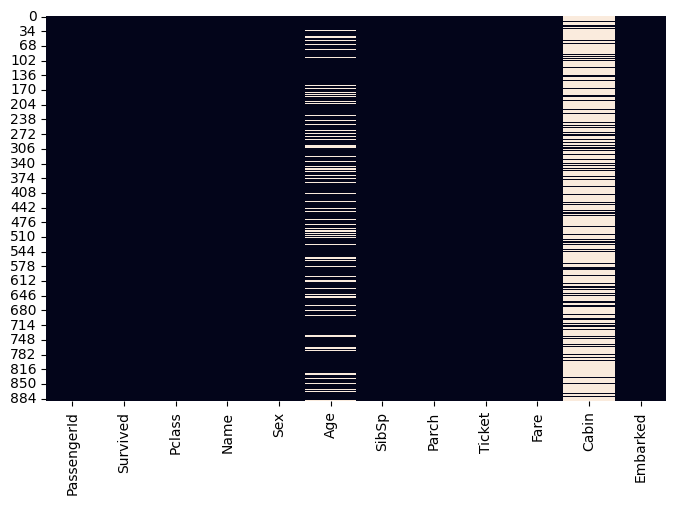

In [75]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(titanic.isnull(), cbar=False)
plt.show()

In [76]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [78]:
# Load the data
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [81]:
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

### Mean and Median of "age" Variable

In [82]:

mean_age = df["age"].mean()
median_age = df["age"].median()

print(mean_age)
print(median_age)

29.69911764705882
28.0


In [83]:
embark_town_mod = df['embark_town'].mode()

print("Mode of Embark_town:", embark_town_mod)

Mode of Embark_town: 0    Southampton
Name: embark_town, dtype: object


In [84]:
value_counts = df['embark_town'].value_counts()

print("Value counts in embark_town:\n", value_counts)

Value counts in embark_town:
 embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


### Why should we need to handle missing values
- From this point onward we will use dataset loaded in df which is loaded from Seaborn
- Improves Model Accuracy: Missing values can distort patterns in the data, leading to biased or inaccurate predictions.
- Preserves Data Integrity: Unhandled missing data may result in invalid or misleading analysis and conclusions.
- Ensures Compatibility: Many machine learning algorithms cannot process datasets with missing values.
- Reduces Bias: Ignoring missing values or mishandling them can introduce bias, especially if the missingness is not random.
- Maximizes Data Usage: Proper handling of missing values allows more data to be utilized, avoiding unnecessary data loss.
- Enhances Data Quality: Addressing missing values is crucial for creating a reliable and trustworthy dataset.
- Enables Robust Insights: Handling missing values appropriately ensures the insights derived from the data are meaningful and representative.

In [85]:
# Handling missing values
# df['age'] = df['age'].fillna(df['age'].mean())
df['age'] = df['age'].fillna(df['age'].median())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [86]:
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

In [87]:
# Impute missing values with Forward Fill
df['age'] = df['age'].ffill()

In [88]:
# Impute missing values with Backward Fill
df['age'] = df['age'].bfill()

In [89]:
# Impute "age" with KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df["age"] = imputer.fit_transform(df[["age"]])

In [90]:
# Fill missing values ith deeplearning
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer() # Initialize the imputer
df["age"] = imputer.fit_transform(df[["age"]]) # Impute missing values in 'age' colum

imputer = IterativeImputer() df["age"] = imputer.fit_transform(df[["age"]])

SyntaxError: invalid syntax (2629670974.py, line 8)

In [ ]:
# Fill missing values ith deeplearning
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer() # Initialize the imputer
df["age"] = imputer.fit_transform(df[["age"]]) # Impute missing values in 'age' colum

imputer = IterativeImputer(); df["age"] = imputer.fit_transform(df[["age"]])

In [91]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64